**LIMPIEZA DE EEG USANDO ICA EN MNE**

Al realizar la limpieza de EEG desde la librería mne de python, mne implementa tres algoritmos de ICA diferentes, fastICA, infomax y picard, despues de aplicar el modelo que deseemos, las componentes ICA que deseemos descartar deben elegirse, y el ICA deberá ser aplicado a el objeto "RAW" o "Epochs" usando el objeto ICA y aplicando el método "apply".

Como típicamente se hace en ICA, los datos deben primero escalarse a varianza unitaria y blanqueamiento usando el análisis de componentes principales, antes de aplicar la descomposición ICA.

    - Para lidiar con diferentes unidades en los canales, los datos deben ser tratados con pre-blanqueamiento. 

In [18]:
import mne

raw = mne.io.read_raw_edf("/home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf", preload= True)


Extracting EDF parameters from /home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245759  =      0.000 ...   239.999 secs...


Extracting EDF parameters from /home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf, 64 x 245760 (240.0 s), ~64 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: 2021-08-24 10:56:14 UTC
 nchan: 64
 projs: []
 sfreq: 1024.0 Hz
>


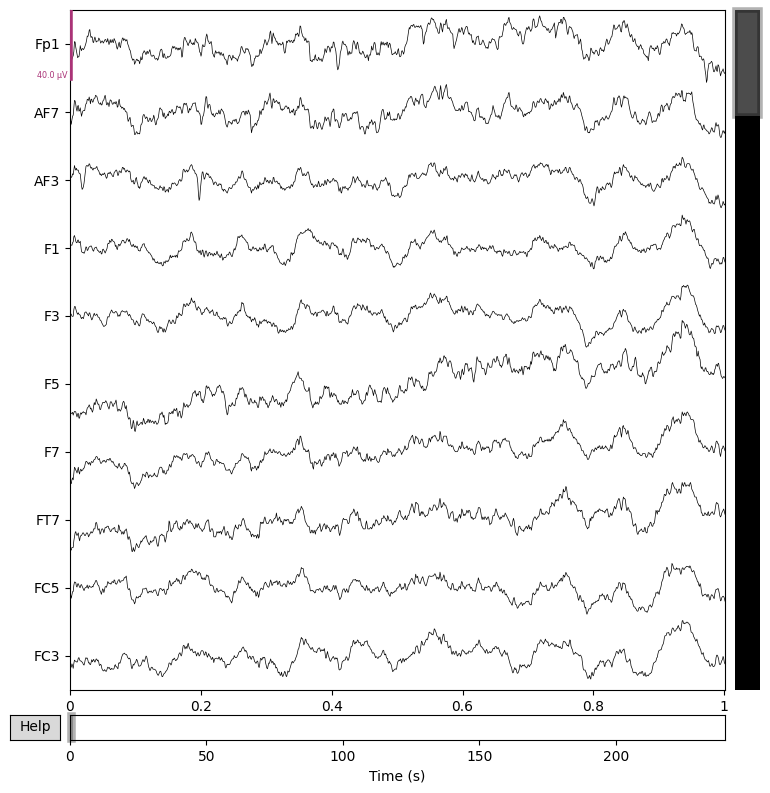

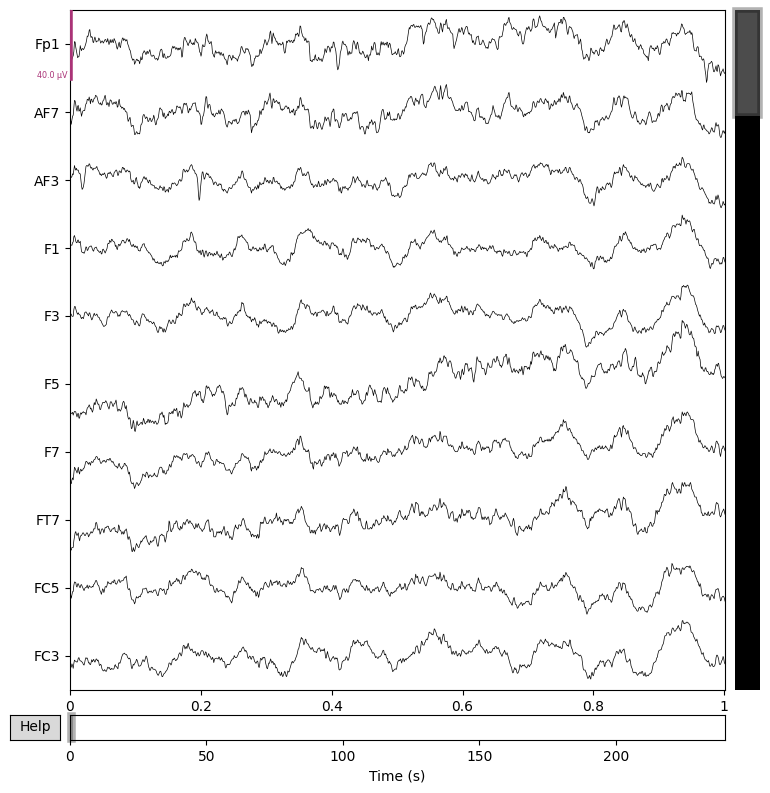

In [15]:
import mne

raw = mne.io.read_raw_edf("/home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/MD5E-s31473920--a4aa13370458a970886967bd6dc6d672.edf")


print(raw)
print(raw.info)


raw.plot(duration=1, n_channels=10)

In [19]:
import mne
import matplotlib.pyplot as plt

def apply_preprocessing(raw_data, lowcut_bp, highcut_bp, freq_notch, new_sampling_rate=None):
    # Aplicar filtro pasa banda
    raw_filtered = raw_data.copy()
    raw_filtered.filter(lowcut_bp, highcut_bp, method='fir', phase='zero-double')

    # Aplicar filtro notch
    raw_filtered.notch_filter(freq_notch, method='fir', phase='zero-double')

    # Aplicar referencia
    raw_filt_ref = raw_filtered.copy()
    raw_filt_ref.set_eeg_reference(ref_channels='average')

    # Remuestrear solo si new_sampling_rate es diferente de la tasa de muestreo original y no es None
    if new_sampling_rate and raw_filt_ref.info['sfreq'] != new_sampling_rate:
        raw_filt_ref.resample(new_sampling_rate)

    return raw_filtered, raw_filt_ref



# Aplicar los filtros y remuestreo
raw_filtered, raw_filt_ref = apply_preprocessing(raw, 1, 80, 60, 256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 80 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-12 dB cutoff frequency: 90.00 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.90 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.5s finished


In [28]:
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw_filt_ref)


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components
Fitting ICA took 202.5s.


/home/steve/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/tmp/ipykernel_49463/2976785088.py:2: RuntimeWarning: Using n_components=64 (resulting in n_components_=64) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 63
  ica.fit(raw_filt_ref)


Method,fastica
Fit,800 iterations on raw data (61440 samples)
ICA components,64
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=5, n_times=61440
    Range : 0 ... 61439 =      0.000 ...   239.996 secs
Ready.


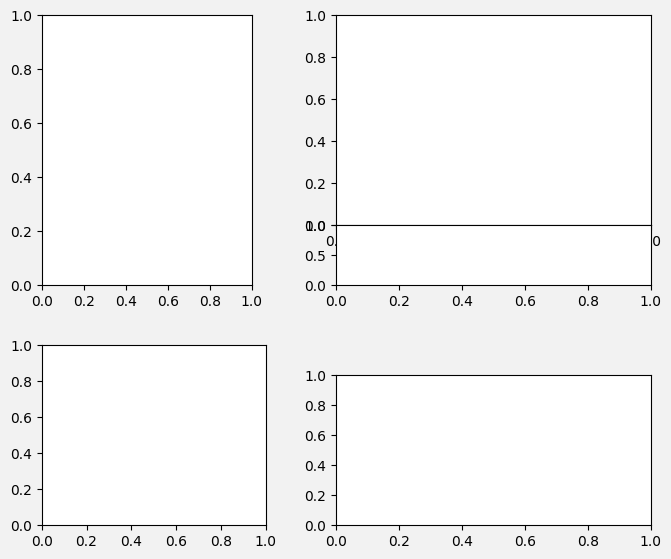

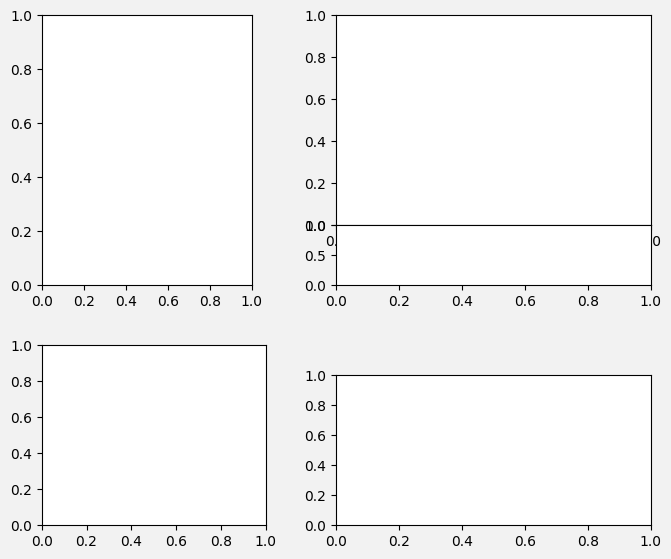

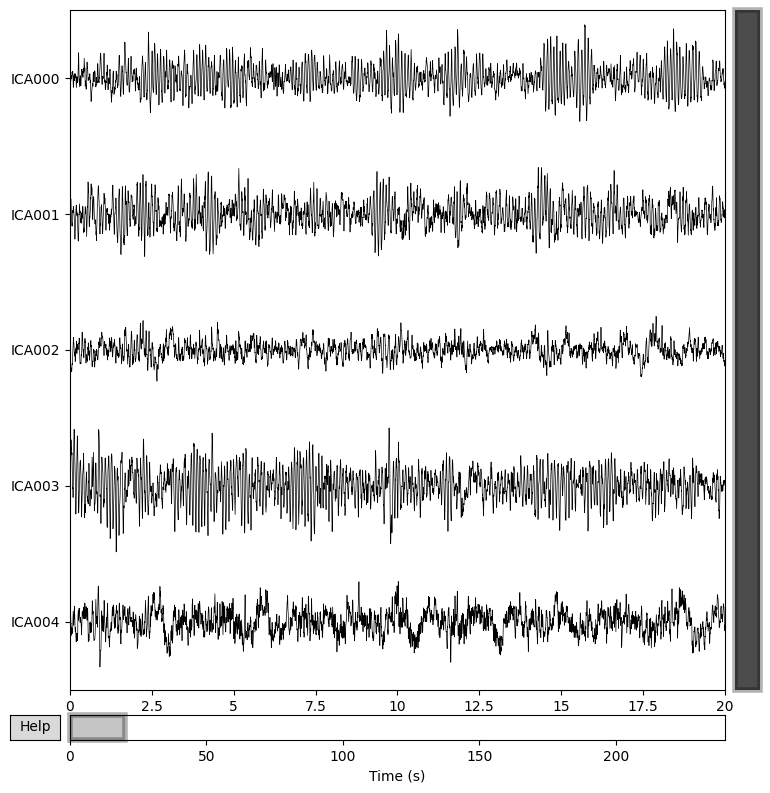

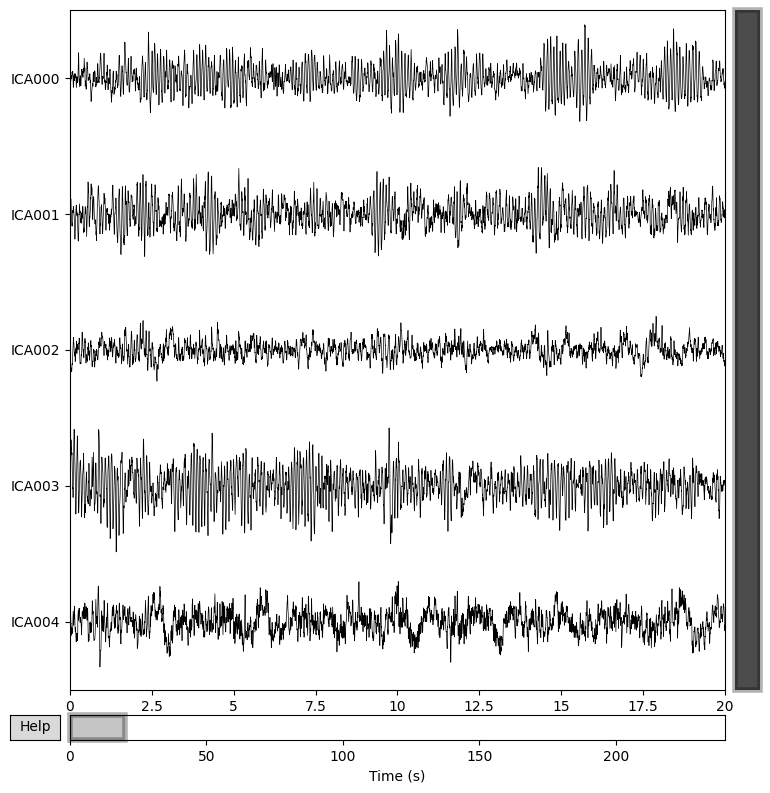

In [27]:
ica.plot_sources(raw_filt_ref)

In [1]:
ica = mne.preprocessing.ICA(n_components=5, random_state=97, max_iter=800)
ica.fit(raw)
ica.plot_properties(raw)


NameError: name 'mne' is not defined

**LIMPIEZA AUTOMÁTICA DE EOG USANDO KURTOSIS**

In [ ]:
import numpy as np
import mne

def calc_kurt(eeg_matrix):

    mean = np.mean(eeg_matrix, axis=1, kepdims=True)
    desv = np.std(eeg_matrix, axis=1, keepdims=True)
    norm_eeg_mat = (eeg_matrix - mean)/desv
    curt= np.mean(norm_eeg_mat ** 4, axis=0)
    kurtosis = curt-3

    return kurtosis, norm_eeg_mat



def curtosis_cleaning():
    
